In [54]:
from campa.tl import Experiment, FeatureExtractor
import os
from campa.pl import plot_mean_intensity, zscore, get_intensity_change, plot_intensity_change, plot_mean_size, plot_size_change
from campa.pl import plot_co_occurrence, plot_co_occurrence_grid
import anndata as ad
from campa.utils import init_logging
import numpy as np
import pandas as pd
import logging
init_logging(level=logging.WARNING)

# add missing params to adata.uns['params']
They keep disappearing when not adding them right before saving, really weird...

In [2]:
data_dir = 'HeLa_scrambled/K19'

In [6]:
data_dir = '184A1_unperturbed/I11'
for data_dir in [ "184A1_unperturbed/I09", "184A1_unperturbed/I11", "184A1_unperturbed/J10", "184A1_unperturbed/J12",
    "184A1_DMSO/I14", "184A1_DMSO/J16", "184A1_AZD4573/I13", "184A1_AZD4573/I17", "184A1_AZD4573/J14",
    "184A1_AZD4573/J18", "184A1_AZD4573/J21", "184A1_CX5461/I18", "184A1_CX5461/J09", "184A1_CX5461/J22",
    "184A1_TSA/I16", "184A1_TSA/J13", "184A1_TSA/J20", "184A1_triptolide/I10", "184A1_triptolide/J15",
    "184A1_meayamycin/I12", "184A1_meayamycin/I20"]:
    print(data_dir)
    adata = ad.read(f'/home/icb/hannah.spitzer/projects/pelkmans/local_experiments/NascentRNA_new/VAE_all/CondVAE_pert-CC/aggregated/full_data/{data_dir}/features_annotation.h5ad')
    adata.uns['params']['exp_name'] = 'VAE_all/CondVAE_pert-CC'
    adata.uns['params']['cluster_dir'] = None
    adata.write(f'/home/icb/hannah.spitzer/projects/pelkmans/local_experiments/NascentRNA_new/VAE_all/CondVAE_pert-CC/aggregated/full_data/{data_dir}/features_annotation.h5ad')



184A1_unperturbed/I09
184A1_unperturbed/I11
184A1_unperturbed/J10
184A1_unperturbed/J12
184A1_DMSO/I14
184A1_DMSO/J16
184A1_AZD4573/I13
184A1_AZD4573/I17
184A1_AZD4573/J14
184A1_AZD4573/J18
184A1_AZD4573/J21
184A1_CX5461/I18
184A1_CX5461/J09
184A1_CX5461/J22
184A1_TSA/I16
184A1_TSA/J13
184A1_TSA/J20
184A1_triptolide/I10
184A1_triptolide/J15
184A1_meayamycin/I12
184A1_meayamycin/I20


In [3]:
#adata = ad.read(f'/home/icb/hannah.spitzer/projects/pelkmans/local_experiments/NascentRNA_new/VAE_SBF2/CondVAE_siRNA-CC/aggregated/full_data/{data_dir}/features_seed3_annotation.h5ad')
#adata.uns['params']['exp_name'] = 'VAE_SBF2/CondVAE_siRNA-CC'
#adata.write(f'/home/icb/hannah.spitzer/projects/pelkmans/local_experiments/NascentRNA_new/VAE_SBF2/CondVAE_siRNA-CC/aggregated/full_data/{data_dir}/features_seed3_annotation.h5ad')



# Check if co-occ scores are missing for given data_dir
for extended distances, co-occ might be 0 for several cells. Check if all mapobject ids at the end of adata are missing -- if yes, need to restart.

In [4]:
for data_dir in ["HeLa_scrambled/K19", "HeLa_scrambled/L18", "HeLa_scrambled/M19", "HeLa_SBF2/K18", "HeLa_SBF2/L19", "HeLa_SBF2/M18"]:
    try:
        extr = FeatureExtractor.from_adata(f'/home/icb/hannah.spitzer/projects/pelkmans/local_experiments/NascentRNA_new/VAE_SBF2/CondVAE_siRNA-CC/aggregated/full_data/{data_dir}/features_seed3_annotation2.h5ad')
        print(data_dir, extr._missing_co_occ_obj_ids())
        print(extr.adata.obs['mapobject_id'][-10:])
    except OSError as e:
        print(data_dir, 'does not exist')

HeLa_scrambled/K19 [200953 200955 200959 210917 225642 225676 233977 233988 233991 233996
 237032 237038 240005 240007 240008 240016 240017 240022 240026 240029
 240035 240037 240044 240045 240047 240050 240054 254998 255002 255007
 255010 255012 255020 255021 255025 255027 255028 255033 255035 255047
 256425 256427 256430 256447 256453 265631 267465 267471 267477 267478
 268825 277987 277988 281727 281729 281847 308819 308828 308831 308832
 308834 308838 308844 320554 320559 320580 346440 346448 346449 346457
 346458 346459 346463 346464 346466 346472 346553 358965 366005 366010
 366015 366039 366049 366057 372396 372399 372403 372408 372413 372414
 372415 372425 372426 372428 372433 372439 379209 379212 379215]
757    379233
758    379234
759    379236
760    379238
761    379239
762    379240
763    379243
764    379244
765    379249
766    379250
Name: mapobject_id, dtype: object
HeLa_scrambled/L18 [194505 217617 217619 227966 227968 227970 227973 227976 227980 227981
 227982 22799

In [20]:
data_dir = 'HeLa_scrambled/K19'
extr = FeatureExtractor.from_adata(f'/home/icb/hannah.spitzer/projects/pelkmans/local_experiments/NascentRNA_new/VAE_SBF2/CondVAE_siRNA-CC/aggregated/full_data/{data_dir}/features_seed3_annotation_cytoplasm.h5ad')
print(extr._missing_co_occ_obj_ids())

data_dir = 'HeLa_SBF2/K18'
extr2 = FeatureExtractor.from_adata(f'/home/icb/hannah.spitzer/projects/pelkmans/local_experiments/NascentRNA_new/VAE_SBF2/CondVAE_siRNA-CC/aggregated/full_data/{data_dir}/features_seed3_annotation_cytoplasm.h5ad')
print(extr2._missing_co_occ_obj_ids())

[]
[]


In [25]:
adata = ad.concat([extr.adata, extr2.adata], index_unique='-', uns_merge='same')

In [26]:
adata.obsm['co_occurrence_cytoplasm_nucleus']

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,26
0-0,0.037160,0.045366,0.049833,0.060167,0.071147,0.082238,0.092947,0.105650,0.120991,0.139849,...,0.470712,0.552876,0.648524,0.761957,0.897233,1.051140,1.172943,1.246033,1.238394,1.201039
1-0,0.034704,0.043004,0.046783,0.056989,0.068492,0.080812,0.093915,0.110318,0.130032,0.154796,...,0.649992,0.770951,0.900727,1.029228,1.136181,1.207515,1.252253,1.219148,1.099460,1.024285
2-0,0.026568,0.032802,0.035683,0.043759,0.052760,0.062186,0.072582,0.085819,0.101999,0.122481,...,0.516816,0.609735,0.711534,0.825322,0.947717,1.063168,1.149291,1.195459,1.189280,1.151600
3-0,0.041393,0.050997,0.055527,0.068442,0.082730,0.097952,0.114078,0.133822,0.157159,0.186347,...,0.685497,0.791906,0.912611,1.052949,1.178785,1.244189,1.262857,1.218025,1.106660,1.065855
4-0,0.035500,0.044198,0.048289,0.059632,0.072114,0.085026,0.098256,0.114566,0.134577,0.160205,...,0.623573,0.743675,0.879260,1.023208,1.159602,1.240381,1.291205,1.241266,1.105414,1.008783
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119-1,0.020418,0.025267,0.027283,0.033610,0.040847,0.048466,0.057027,0.067856,0.081052,0.097700,...,0.421162,0.501492,0.593835,0.702062,0.829760,0.979929,1.141195,1.245728,1.272780,1.202838
120-1,0.022643,0.027563,0.030760,0.037199,0.044211,0.052079,0.060180,0.070417,0.083234,0.099283,...,0.404527,0.485171,0.581461,0.695489,0.822852,0.956983,1.086902,1.176502,1.221945,1.215226
121-1,0.022020,0.027589,0.028914,0.035283,0.042277,0.048866,0.056240,0.065625,0.076767,0.090953,...,0.375194,0.449856,0.538907,0.642984,0.759830,0.887290,1.009039,1.091460,1.146233,1.180807
122-1,0.020237,0.024737,0.026965,0.032729,0.039099,0.045971,0.053254,0.062381,0.073654,0.087897,...,0.365371,0.436010,0.518540,0.615589,0.727843,0.855994,0.992693,1.103811,1.172640,1.188796


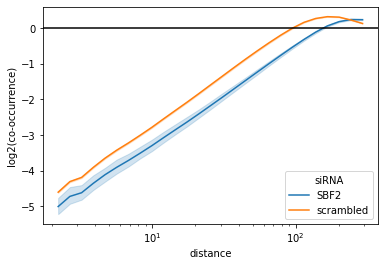

In [30]:
plot_co_occurrence(adata, 'cytoplasm', 'nucleus', 'siRNA')

(<Figure size 1440x1440 with 4 Axes>,
 array([[<AxesSubplot:title={'center':'cytoplasm'}, xlabel='distance', ylabel='log2(co-occurrence)'>,
         <AxesSubplot:title={'center':'nucleus'}, xlabel='distance', ylabel='log2(co-occurrence)'>],
        [<AxesSubplot:xlabel='distance', ylabel='log2(co-occurrence)'>,
         <AxesSubplot:xlabel='distance', ylabel='log2(co-occurrence)'>]],
       dtype=object))

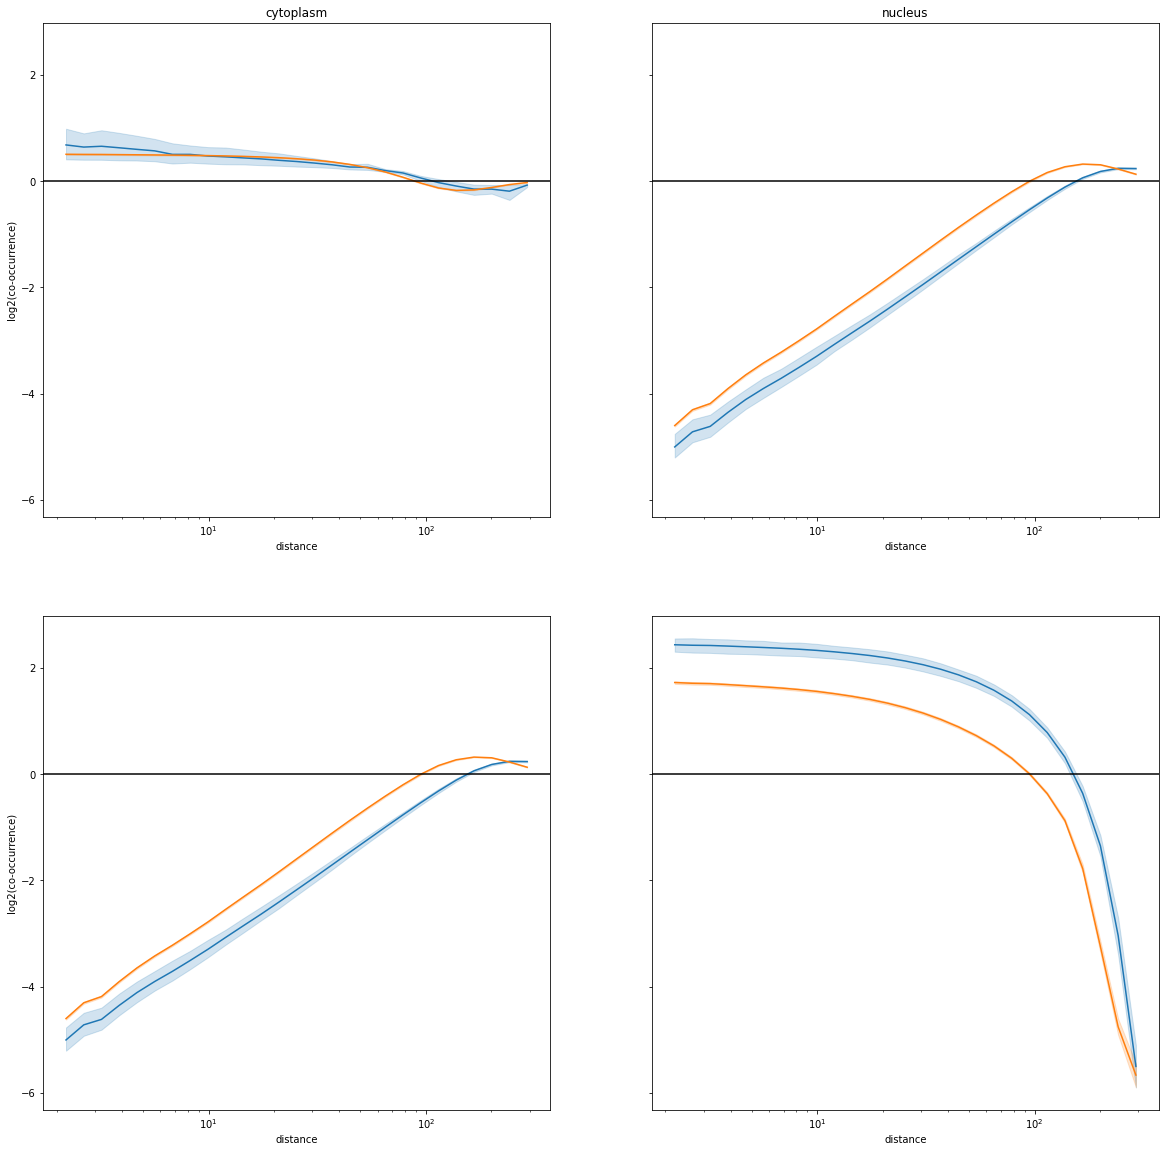

In [31]:
plot_co_occurrence_grid(adata, 'siRNA', condition_values=None, legend=False, ci=95, figsize=(20,20))

# Combine co-occ of 2 adatas

In [49]:
def join_co_occ_scores(exp, name='features_annotation', save_name=None):
    if save_name is None:
        save_name = name
    for data_dir in exp.data_params['data_dirs']:
        print(data_dir)
        p1 = os.path.join(exp.full_path, 'aggregated/full_data', data_dir, f'{name}.h5ad')
        p2 = os.path.join(exp.full_path, 'aggregated/full_data', data_dir, f'{name}2.h5ad')
        extr1 = FeatureExtractor.from_adata(p1)
        extr2 = FeatureExtractor.from_adata(p2)
        
        # create joint adata
        adata = extr1.adata
        adata.uns['co_occurrence_params']['interval'] = np.concatenate([extr1.adata.uns['co_occurrence_params']['interval'], 
                                                                        extr2.adata.uns['co_occurrence_params']['interval'][1:]])
        for c1 in extr1.clusters:
            for c2 in extr1.clusters:
                adata.obsm[f'co_occurrence_{c1}_{c2}'] = pd.concat([extr1.adata.obsm[f'co_occurrence_{c1}_{c2}'], 
                               extr2.adata.obsm[f'co_occurrence_{c1}_{c2}']], axis=1, ignore_index=True)
                adata.obsm[f'co_occurrence_{c1}_{c2}'].columns =  adata.obsm[f'co_occurrence_{c1}_{c2}'].columns.astype('str')
        # set exp name in adata.uns
        adata.uns['params']['exp_name'] = exp.dir + '/' + exp.name
        adata.write(os.path.join(exp.full_path, 'aggregated/full_data', data_dir, f'{save_name}.h5ad'))

In [50]:
exp = Experiment.from_dir('VAE_SBF2/CondVAE_siRNA-CC')
join_co_occ_scores(exp, name='features_seed3_annotation_cytoplasm', save_name='features_seed3_annotation_cytoplasm_comb')

HeLa_SBF2/K18
HeLa_SBF2/L19
HeLa_SBF2/M18
HeLa_scrambled/K19
HeLa_scrambled/L18
HeLa_scrambled/M19


In [51]:
# check co-occ scores
extrs = [FeatureExtractor.from_adata(os.path.join(exp.full_path, 'aggregated/full_data', data_dir, 'features_seed3_annotation_cytoplasm_comb.h5ad')) for data_dir in exp.data_params['data_dirs']]
adata_co_occ = ad.concat([extr.adata for extr in extrs], index_unique='-', uns_merge='same')

(<Figure size 1440x1440 with 4 Axes>,
 array([[<AxesSubplot:title={'center':'cytoplasm'}, xlabel='distance', ylabel='log2(co-occurrence)'>,
         <AxesSubplot:title={'center':'nucleus'}, xlabel='distance', ylabel='log2(co-occurrence)'>],
        [<AxesSubplot:xlabel='distance', ylabel='log2(co-occurrence)'>,
         <AxesSubplot:xlabel='distance', ylabel='log2(co-occurrence)'>]],
       dtype=object))

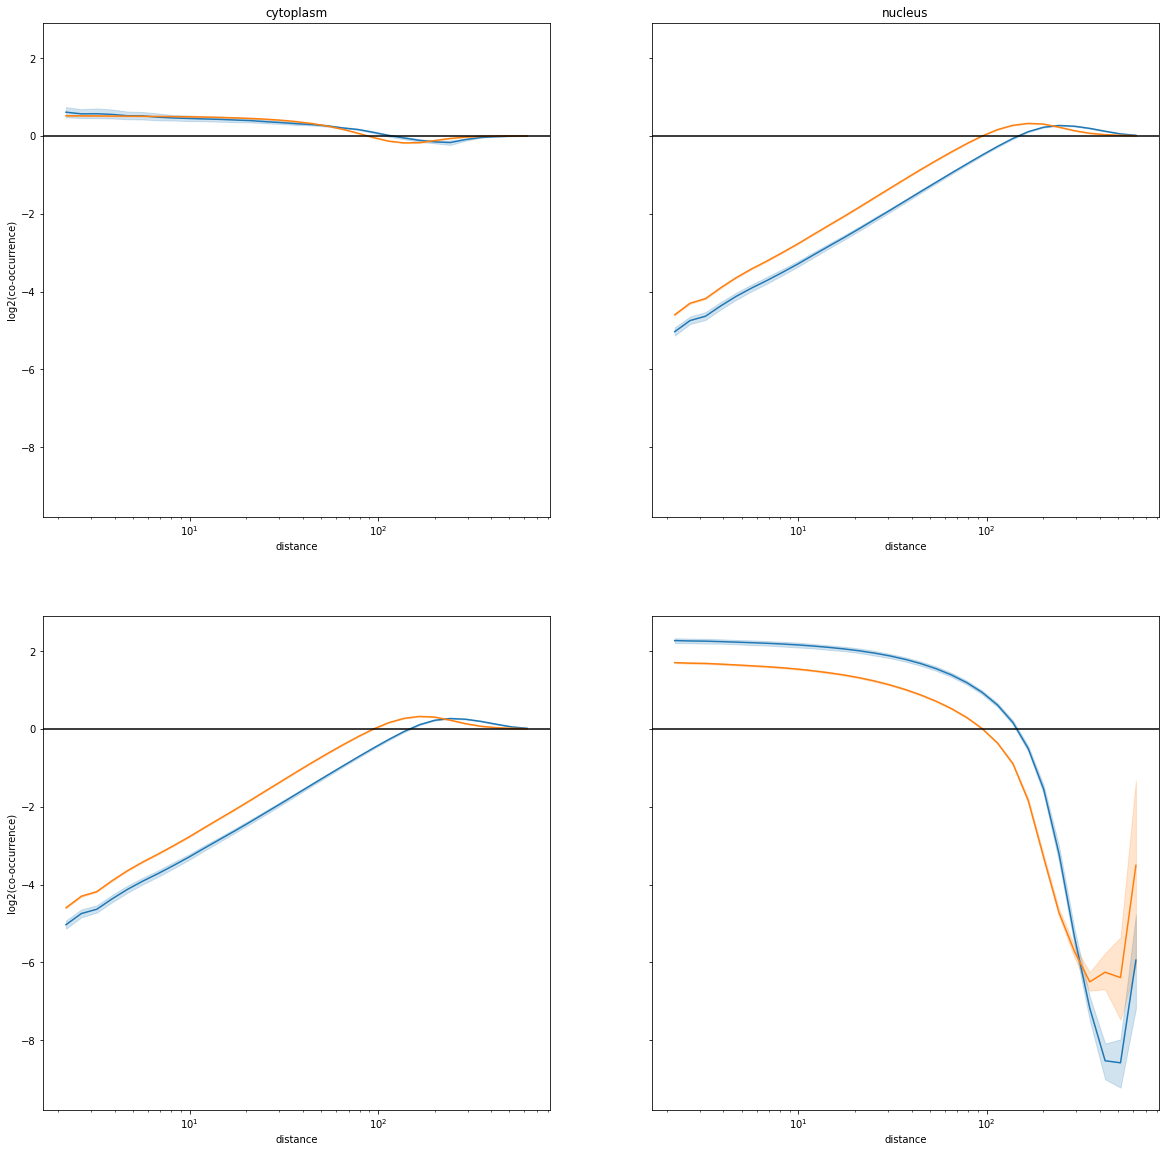

In [53]:
plot_co_occurrence_grid(adata_co_occ, 'siRNA', condition_values=None, legend=False, ci=95, figsize=(20,20))

In [55]:
exp = Experiment.from_dir('VAE_SBF2/CondVAE_siRNA-CC')
join_co_occ_scores(exp, name='features_seed3_annotation', save_name='features_seed3_annotation_comb')

HeLa_SBF2/K18
HeLa_SBF2/L19
HeLa_SBF2/M18
HeLa_scrambled/K19
HeLa_scrambled/L18
HeLa_scrambled/M19


In [56]:
# check co-occ scores
extrs = [FeatureExtractor.from_adata(os.path.join(exp.full_path, 'aggregated/full_data', data_dir, 'features_seed3_annotation_comb.h5ad')) for data_dir in exp.data_params['data_dirs']]
adata_co_occ = ad.concat([extr.adata for extr in extrs], index_unique='-', uns_merge='same')

(<Figure size 2160x2160 with 256 Axes>,
 array([[<AxesSubplot:title={'center':'Antibody aggregates'}, xlabel='distance', ylabel='log2(co-occurrence)'>,
         <AxesSubplot:title={'center':'Cajal bodies'}, xlabel='distance', ylabel='log2(co-occurrence)'>,
         <AxesSubplot:title={'center':'Cell-cell contacts'}, xlabel='distance', ylabel='log2(co-occurrence)'>,
         <AxesSubplot:title={'center':'Cytoplasm'}, xlabel='distance', ylabel='log2(co-occurrence)'>,
         <AxesSubplot:title={'center':'ER (perinuclear)'}, xlabel='distance', ylabel='log2(co-occurrence)'>,
         <AxesSubplot:title={'center':'ER (peripheral)'}, xlabel='distance', ylabel='log2(co-occurrence)'>,
         <AxesSubplot:title={'center':'Focal adhesions'}, xlabel='distance', ylabel='log2(co-occurrence)'>,
         <AxesSubplot:title={'center':'Golgi apparatus'}, xlabel='distance', ylabel='log2(co-occurrence)'>,
         <AxesSubplot:title={'center':'HDAC3 foci'}, xlabel='distance', ylabel='log2(co-occurrenc

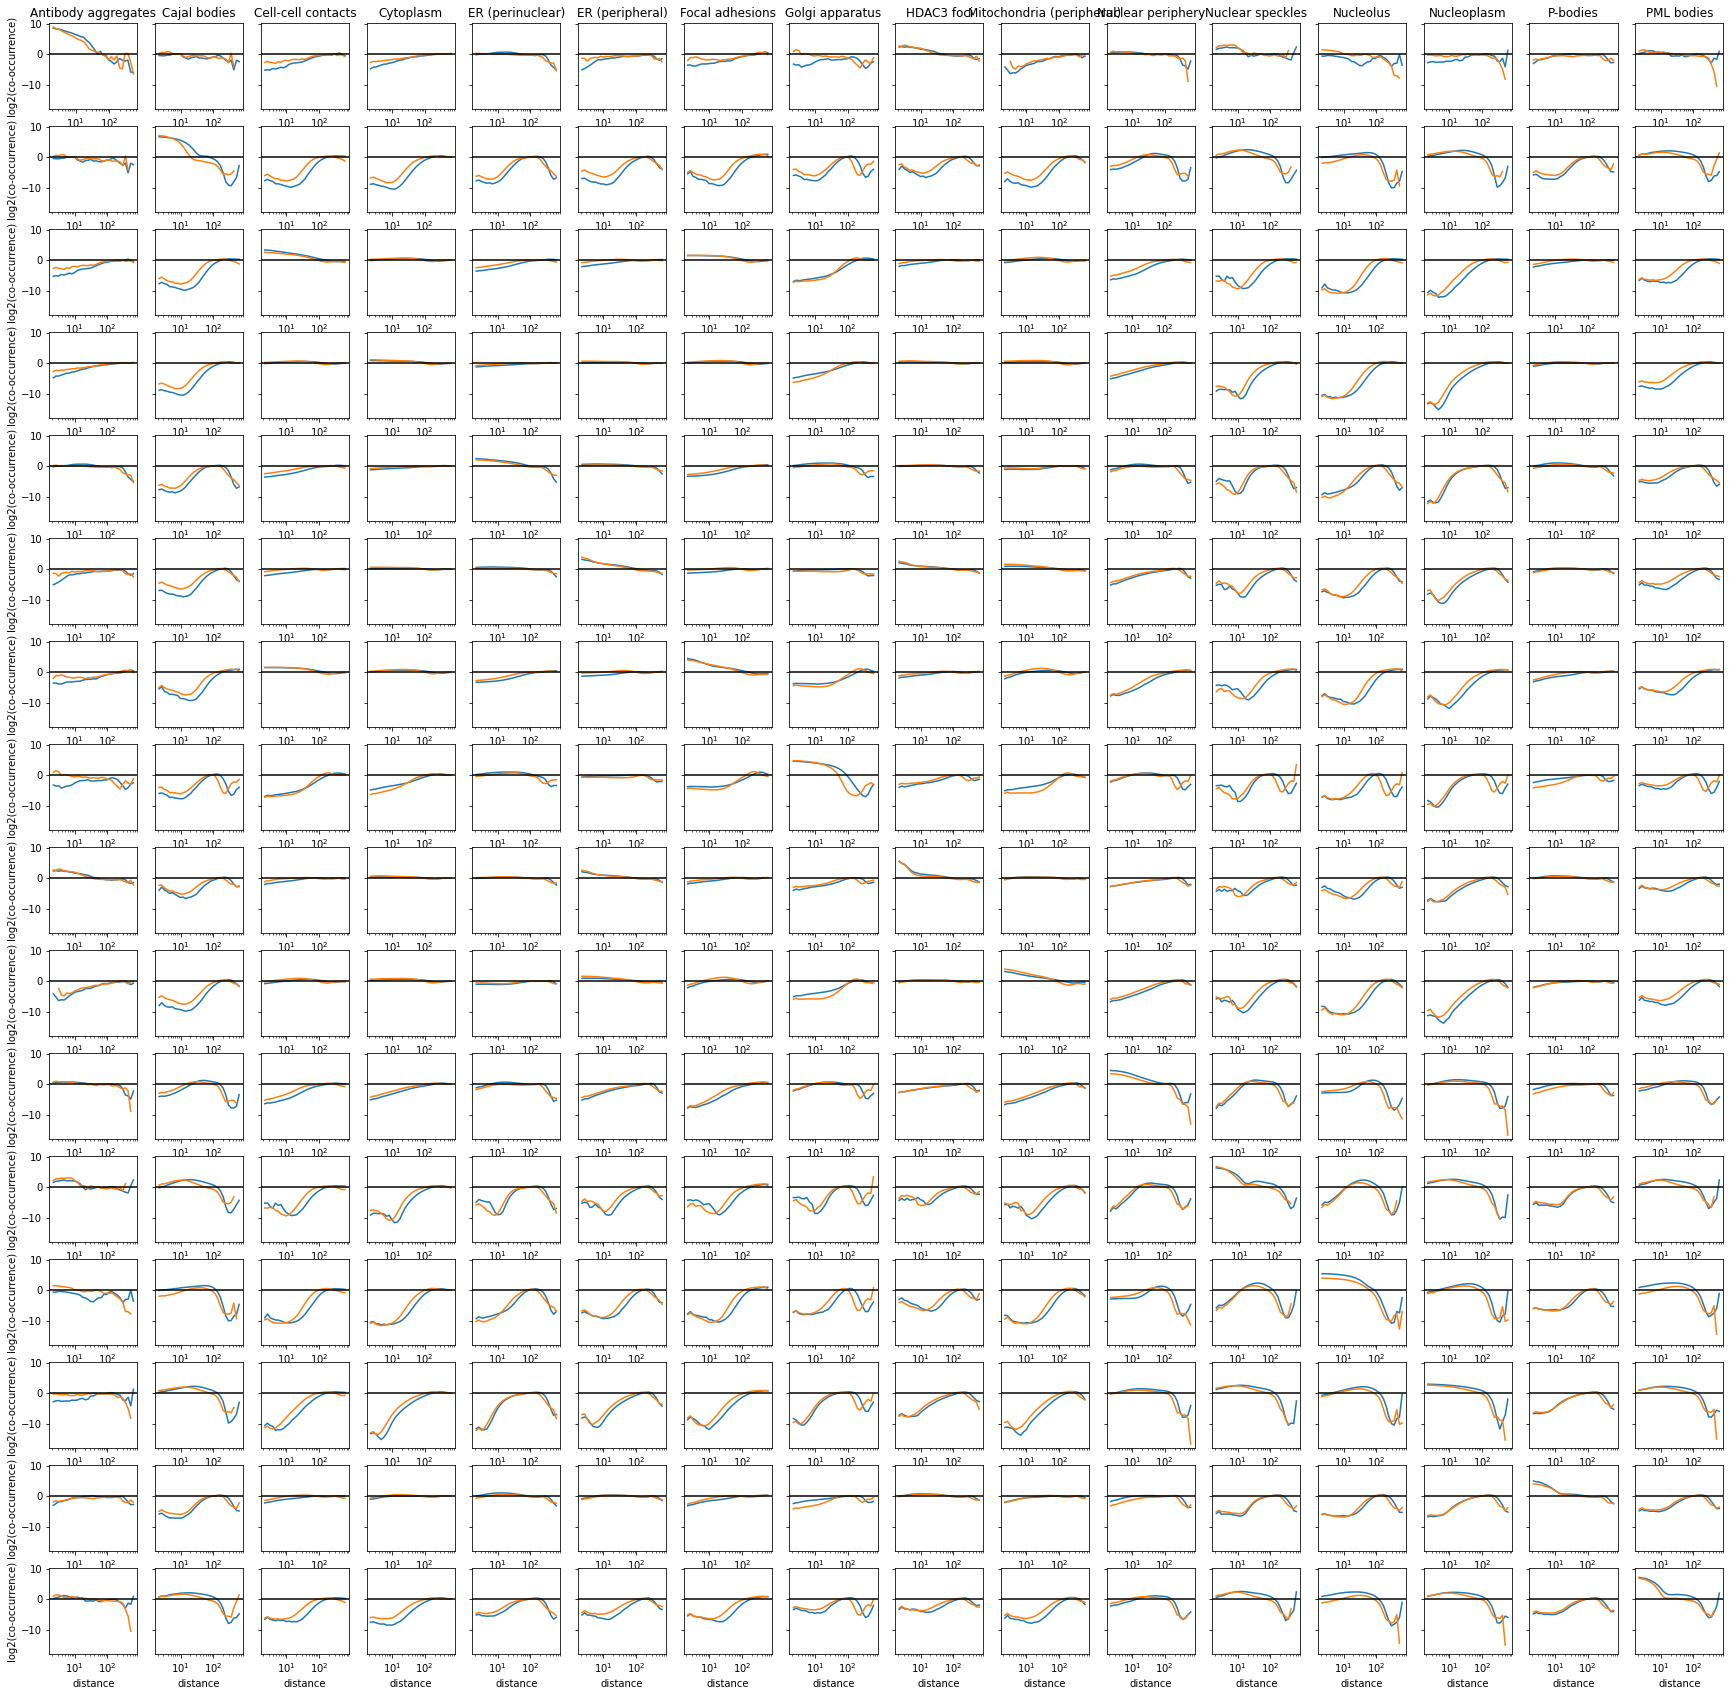

In [62]:
plot_co_occurrence_grid(adata_co_occ, 'siRNA', condition_values=None, legend=False, ci=None, figsize=(30,30))

In [67]:
# clean up saved features
# remove features_seed3_annotation, features_seed3_annotation2. 
# move features_seed3_annotation_comb to features_seed3_annotation
#for data_dir in exp.data_params['data_dirs']:
#    os.replace(
#        os.path.join(exp.full_path, 'aggregated/full_data', data_dir, 'features_seed3_annotation_comb.h5ad'),
#        os.path.join(exp.full_path, 'aggregated/full_data', data_dir, 'features_seed3_annotation.h5ad'))
#    os.remove(os.path.join(exp.full_path, 'aggregated/full_data', data_dir, 'features_seed3_annotation2.h5ad'))

In [68]:
#for data_dir in exp.data_params['data_dirs']:
#    os.replace(
#        os.path.join(exp.full_path, 'aggregated/full_data', data_dir, 'features_seed3_annotation_cytoplasm_comb.h5ad'),
#        os.path.join(exp.full_path, 'aggregated/full_data', data_dir, 'features_seed3_annotation_cytoplasm.h5ad'))
#    os.remove(os.path.join(exp.full_path, 'aggregated/full_data', data_dir, 'features_seed3_annotation_cytoplasm2.h5ad'))

In [69]:
# check co-occ scores
extrs = [FeatureExtractor.from_adata(os.path.join(exp.full_path, 'aggregated/full_data', data_dir, 'features_seed3_annotation.h5ad')) for data_dir in exp.data_params['data_dirs']]
adata_co_occ = ad.concat([extr.adata for extr in extrs], index_unique='-', uns_merge='same')

(<Figure size 2160x2160 with 256 Axes>,
 array([[<AxesSubplot:title={'center':'Antibody aggregates'}, xlabel='distance', ylabel='log2(co-occurrence)'>,
         <AxesSubplot:title={'center':'Cajal bodies'}, xlabel='distance', ylabel='log2(co-occurrence)'>,
         <AxesSubplot:title={'center':'Cell-cell contacts'}, xlabel='distance', ylabel='log2(co-occurrence)'>,
         <AxesSubplot:title={'center':'Cytoplasm'}, xlabel='distance', ylabel='log2(co-occurrence)'>,
         <AxesSubplot:title={'center':'ER (perinuclear)'}, xlabel='distance', ylabel='log2(co-occurrence)'>,
         <AxesSubplot:title={'center':'ER (peripheral)'}, xlabel='distance', ylabel='log2(co-occurrence)'>,
         <AxesSubplot:title={'center':'Focal adhesions'}, xlabel='distance', ylabel='log2(co-occurrence)'>,
         <AxesSubplot:title={'center':'Golgi apparatus'}, xlabel='distance', ylabel='log2(co-occurrence)'>,
         <AxesSubplot:title={'center':'HDAC3 foci'}, xlabel='distance', ylabel='log2(co-occurrenc

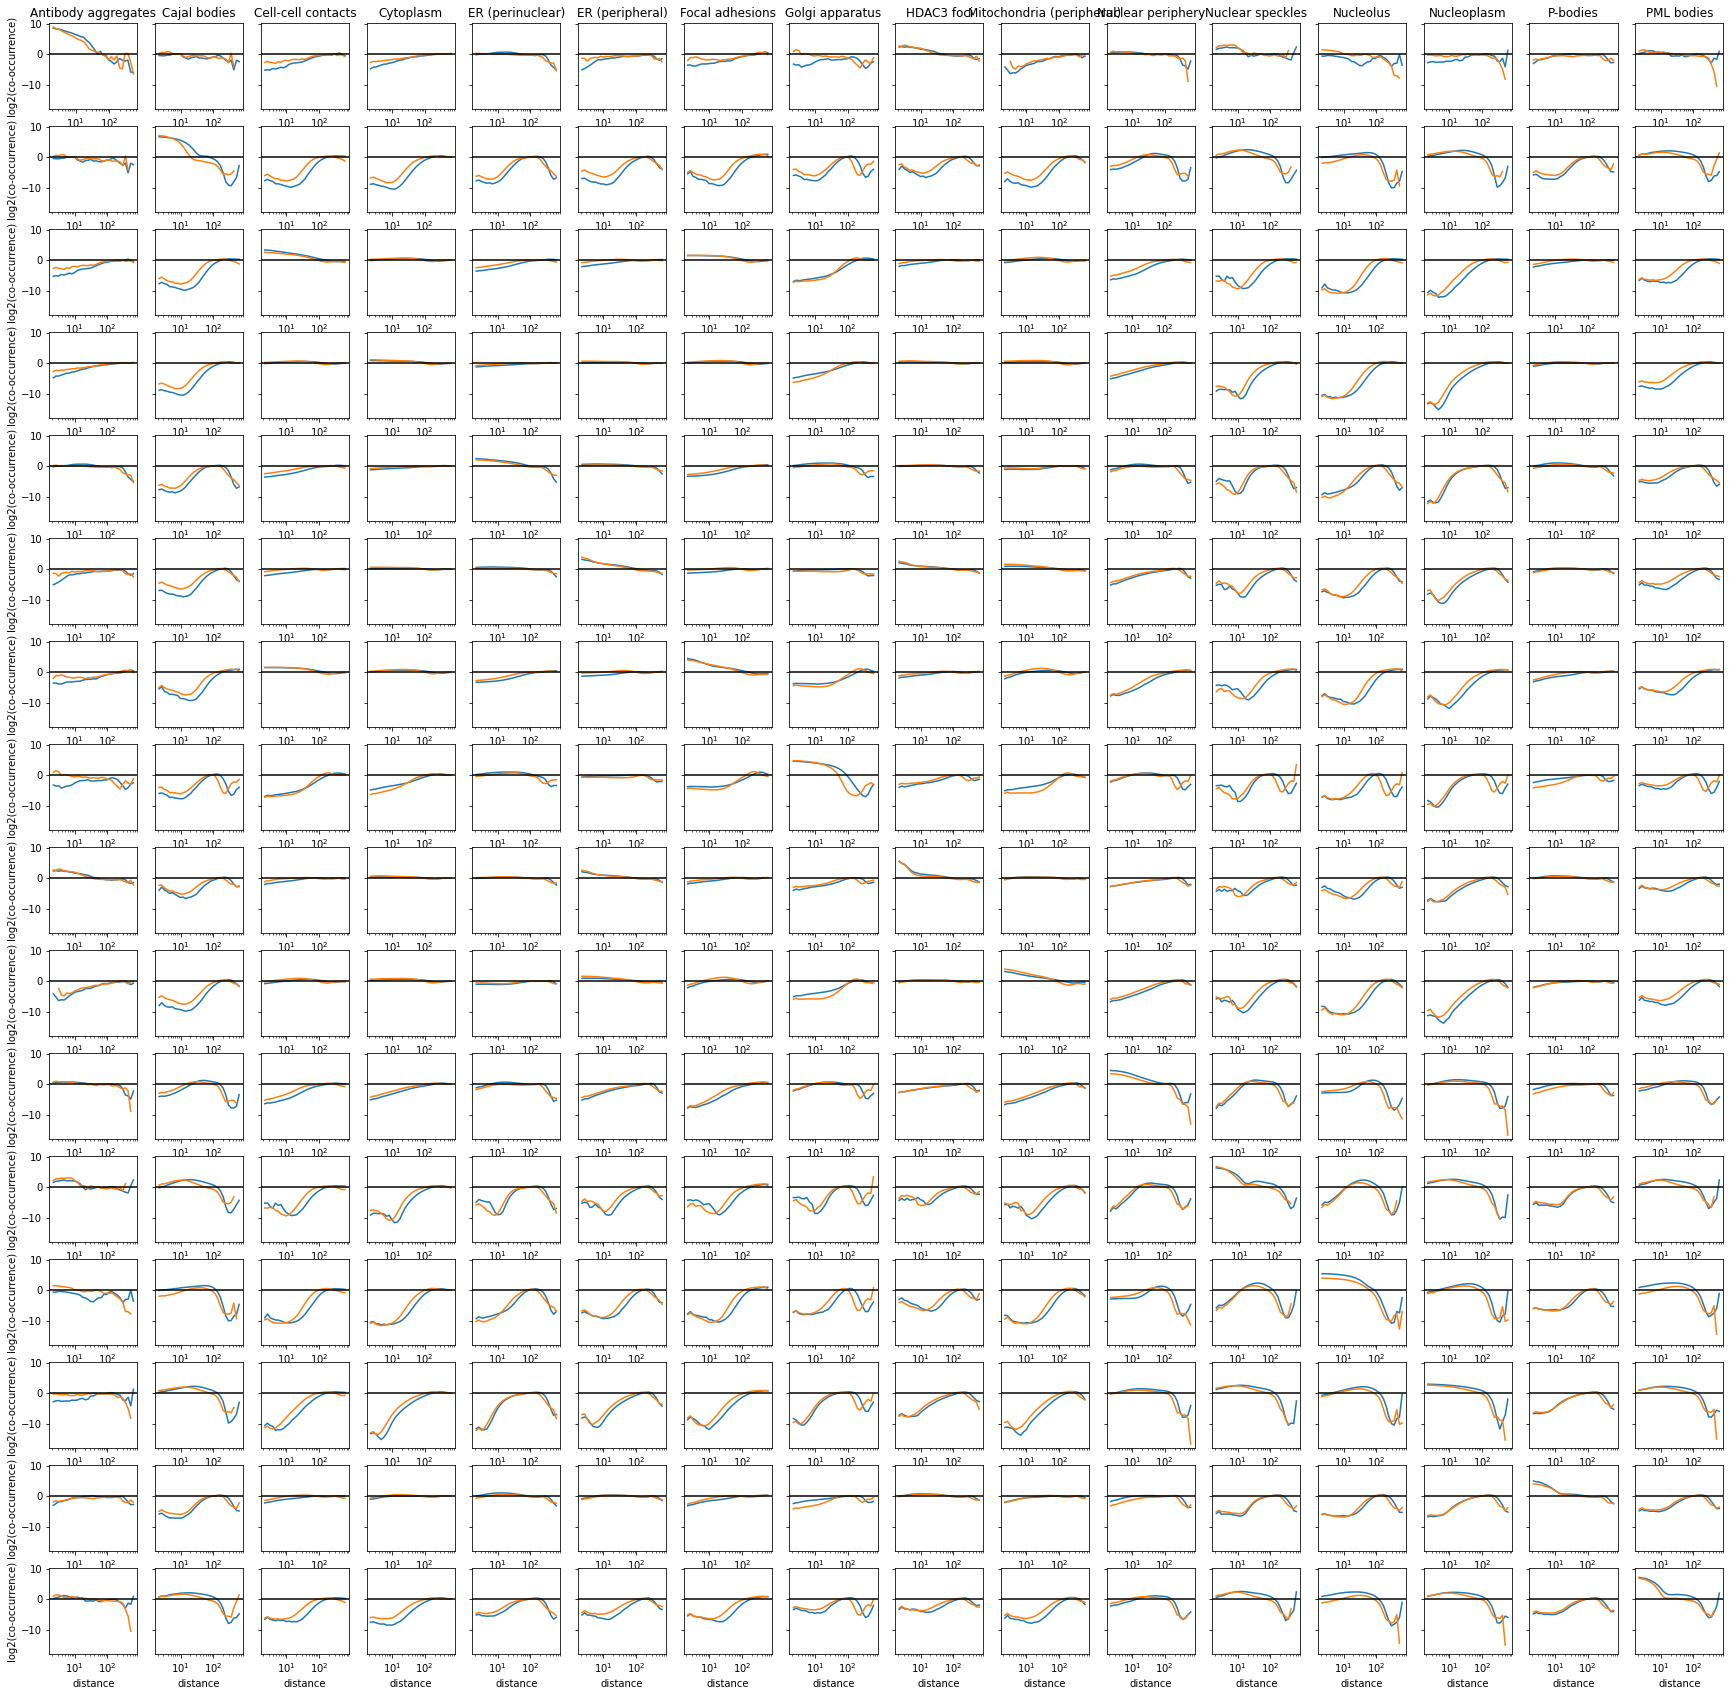

In [70]:
plot_co_occurrence_grid(adata_co_occ, 'siRNA', condition_values=None, legend=False, ci=None, figsize=(30,30))

# Check if co-occ old + new are the same
- features_annotation was calculated with old code
- features_annotation_test was calculated with new code

In [3]:
exp = Experiment.from_dir('VAE_all/CondVAE_pert-CC')

In [6]:
extrs_old = [FeatureExtractor.from_adata(os.path.join(exp.full_path, 'aggregated/full_data', data_dir, 'features_annotation.h5ad')) for data_dir in exp.data_params['data_dirs']]
adata_co_occ_old = ad.concat([extr.adata for extr in extrs_old], index_unique='-', uns_merge='same')

extrs_new = [FeatureExtractor.from_adata(os.path.join(exp.full_path, 'aggregated/full_data', data_dir, 'features_annotation_test.h5ad')) for data_dir in exp.data_params['data_dirs']]
adata_co_occ_new = ad.concat([extr.adata for extr in extrs_new], index_unique='-', uns_merge='same')

In [37]:
adata_co_occ_old.obsm[key]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0-0,1.605527,1.552759,1.524052,1.453303,1.384197,1.316566,1.255290,1.194784,1.138564,1.107126,1.083041,1.064065,1.052625,1.039303,1.011072,0.978112,0.959401,0.950152,0.948947
1-0,1.284820,1.254746,1.243244,1.205757,1.164719,1.126069,1.091770,1.059441,1.030551,1.009390,0.995674,0.988662,0.986281,0.991401,1.016802,1.027640,0.994685,0.971588,0.978651
2-0,1.498488,1.450077,1.430441,1.373000,1.314513,1.256393,1.204441,1.151151,1.103939,1.074668,1.053076,1.031819,1.012158,0.995836,0.984337,0.983562,0.993582,0.999600,0.988640
3-0,1.548151,1.490448,1.457249,1.386431,1.312528,1.241272,1.176068,1.113760,1.055202,1.015570,0.981375,0.949654,0.945803,0.976077,0.991162,0.990429,1.012337,0.987267,0.993822
4-0,1.658658,1.599559,1.576009,1.496685,1.418087,1.338791,1.267513,1.191390,1.115306,1.057536,1.028543,1.026221,1.038618,1.018375,0.992356,0.983651,0.957940,0.964779,0.984196
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
433-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
434-20,1.837912,1.771905,1.734930,1.645891,1.567062,1.485101,1.402714,1.309190,1.201029,1.110128,1.038909,0.990109,0.971381,0.991055,1.017670,0.997276,0.958989,0.975833,0.975658
435-20,2.583852,2.449358,2.400722,2.253981,2.122080,1.988686,1.864005,1.723143,1.555512,1.398864,1.246996,1.108347,1.007555,0.931928,0.843850,0.840507,0.950873,1.073804,0.999898
436-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
adata_co_occ_new.obsm[key]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0-0,1.574296,1.522224,1.497547,1.429276,1.363952,1.300356,1.242914,1.185952,1.130946,1.095406,1.063662,1.037766,1.028053,1.025430,1.011245,0.992518,0.969635,0.957514,0.954161
1-0,1.227026,1.197603,1.185756,1.150518,1.115125,1.084152,1.058494,1.036718,1.017987,1.003706,0.995219,0.989665,0.985945,0.982491,1.004487,1.021002,0.996906,0.983341,1.005428
2-0,1.396940,1.358594,1.342537,1.300665,1.261556,1.221636,1.185880,1.146012,1.106612,1.080329,1.062117,1.039507,1.016353,1.000631,0.987110,0.981668,0.980029,0.974262,0.976770
3-0,1.519505,1.466442,1.434035,1.364255,1.293333,1.223172,1.161257,1.103864,1.052006,1.017261,0.985383,0.954265,0.951892,0.983706,0.994688,0.987366,1.006382,0.985945,0.993298
4-0,1.546710,1.500138,1.480810,1.419137,1.358073,1.296314,1.240161,1.180837,1.121524,1.076386,1.052303,1.044133,1.055448,1.042563,1.007792,0.980729,0.959435,0.968968,0.963754
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
433-20,1.480651,1.445940,1.429813,1.387421,1.344204,1.299561,1.256829,1.213155,1.167176,1.128728,1.099252,1.079540,1.070015,1.056669,1.035398,1.017433,1.013066,0.979055,0.960238
434-20,1.837912,1.771905,1.734930,1.645891,1.567062,1.485101,1.402714,1.309190,1.201029,1.110128,1.038909,0.990109,0.971381,0.991055,1.017670,0.997276,0.958989,0.975833,0.975538
435-20,2.583852,2.449359,2.400722,2.253981,2.122081,1.988686,1.864005,1.723143,1.555512,1.398864,1.246996,1.108347,1.007555,0.931928,0.843850,0.840507,0.950873,1.073804,1.000027
436-20,1.419239,1.393456,1.381514,1.346686,1.311045,1.273819,1.237708,1.198689,1.152354,1.108419,1.072203,1.050566,1.042421,1.037998,1.024385,0.997161,0.983364,0.981217,0.984310


nan in new: 0, nan in old: 154


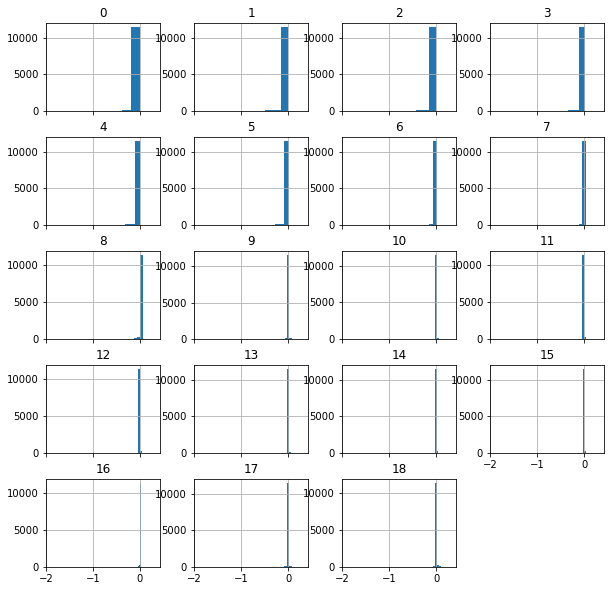

In [35]:
# cluster pair to look at
key = 'co_occurrence_Nucleoplasm_Nucleoplasm'

num_nan_in_new = sum(np.isnan(adata_co_occ_new.obsm[key]).all(axis=1))
num_nan_in_old = sum(np.isnan(adata_co_occ_old.obsm[key]).all(axis=1))

# mask all nan columns of old data
mask = ~np.isnan(adata_co_occ_old.obsm[key]).all(axis=1)

df = (adata_co_occ_new.obsm[key] - adata_co_occ_old.obsm[key])[mask]
df.hist(sharex=True, figsize=(10,10))
print(f'nan in new: {num_nan_in_new}, nan in old: {num_nan_in_old}')

pml bodies: co-occ is different at the extreme border. New co-occ is almost always larger. Is this because I am removing coords that are outside of the cell?

nucleoplasm: new co occ is smaller than old co occ

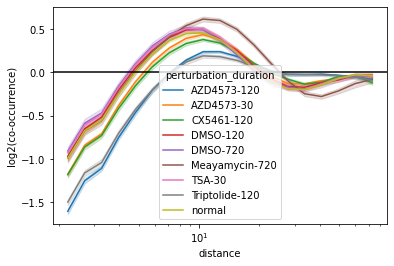

In [38]:
plot_co_occurrence(adata_co_occ_old, 'Nuclear speckles', 'PML bodies', 'perturbation_duration', condition_values=None)

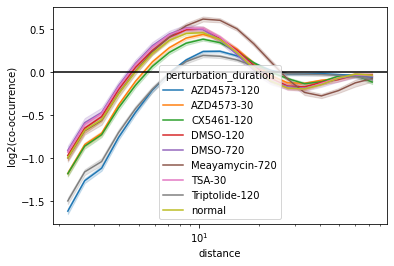

In [39]:
plot_co_occurrence(adata_co_occ_new, 'Nuclear speckles', 'PML bodies', 'perturbation_duration', condition_values=None)

qualitatively, the difference between averaged scores is small (cannot see on plot)